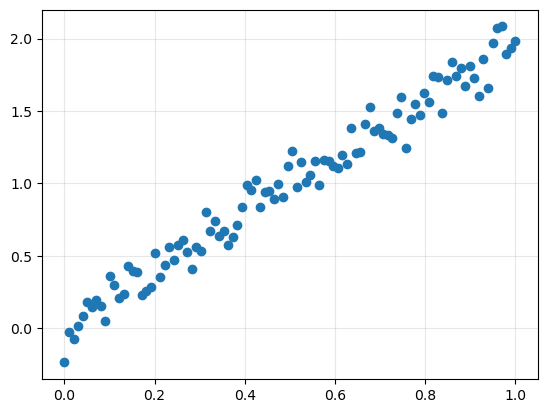

Theta found: [0.0062003  1.97290537], it. 199


In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Generate dataset
# Y = 2X + e, e ~ N(0, 0.1)

X = np.linspace(0, 1, 100)
Y = 2 * X + np.random.normal(0, 0.1, size=X.shape)

# Visualize it
plt.plot(X, Y, 'o')
plt.grid(alpha=0.3)
plt.show()

# Step 2: Define loss function
def l(Theta, X, Y):
    # Loss function should be
    # l(Theta, X, Y) = 1/N sum((Theta[0] + Theta[1]*X_i - Y_i)^2)
    return np.mean(np.square(Theta[0] + Theta[1]*X - Y))

def grad_l(Theta, X, Y):
    N = len(X)
    g1 = 2 * np.mean(Theta[0] + Theta[1]*X - Y)
    g2 = 2 / N * np.dot(Theta[0] + Theta[1]*X - Y, X)
       # 2 * np.mean((Theta[0] + Theta[1]*X - Y) * X)
    return np.array([g1, g2])

def GD(l, grad_l, X, Y, theta_0, eta, maxit, tolL, toltheta):
    # NEEDS TO BE ADJUSTED!!
    for k in range(maxit):
        # GD step        
        theta = theta_0 - eta * grad_l(theta_0, X, Y)

        # Check stopping criteria
        if (np.linalg.norm(grad_l(theta, X, Y)) < tolL) or (np.linalg.norm(theta - theta_0) < toltheta):
            break

        # Update of theta_0
        theta_0 = theta
    return theta, k

# TRY IT (expect solution: (0, 2))
theta_0 = np.array([0, 0])
eta = 0.5
maxit = 200
tolL = 1e-10
toltheta = 1e-10
theta_GD, k_GD = GD(l, grad_l, X, Y, theta_0, eta, maxit, tolL, toltheta)

print(f"Theta found: {theta_GD}, it. {k_GD}")

In [2]:
def SGD(l, grad_l, X, Y, Theta0, lr=1e-2, batch_size=32, epochs=10):
    """
    Simplified Stochastic Gradient Descent (SGD) implementation.
    l: loss function, grad_l: gradient wrt Theta
    X, Y: dataset
    Theta0: initial parameters
    lr: learning rate (eta)
    """
    Theta = Theta0
    for epoch in range(epochs):
        # Something
        # Step 4: Restart the data and shuffle
        shuffle_idx = np.arange(len(X))
        np.random.shuffle(shuffle_idx)

        X = X[shuffle_idx]
        Y = Y[shuffle_idx]

        n_batches = len(X) // batch_size
        for batch in range(n_batches):
            # Step 1: Randomly sample a batch from data
            Xb = X[batch * batch_size : (batch+1) * batch_size]
            Yb = Y[batch * batch_size : (batch+1) * batch_size]

            # Step 2: Compute the grad_l over Xb, Yb
            g = grad_l(Theta, Xb, Yb)

            # Step 3: Perform one step of GD on g
            Theta = Theta - lr * g
    return Theta, epoch



theta_0 = np.array([0, 0])
eta = 0.5
maxit = 200
tolL = 1e-10
toltheta = 1e-10
theta_SGD, k_SGD = SGD(l, grad_l, X, Y, theta_0, lr=eta, 
                       batch_size=10, epochs=50)

print(f"Theta found: {theta_SGD}, it. {k_SGD}")

Theta found: [0.05785064 1.99587374], it. 49
